In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv('shop.csv')
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
data['order_id'] = [str(x) for x in data['order_id']]
data['shop_id'] = [str(x) for x in data['shop_id']]
data['user_id'] = [str(x) for x in data['user_id']]

In [5]:
data['shop_id'].nunique()

100

In [6]:
for i in range(len(data)):
    date_time_str = data['created_at'][i]
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
    data['created_at'][i] = date_time_obj

<ipython-input-6-e0d0fb1b2b3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['created_at'][i] = date_time_obj


In [7]:
data_sort = data.sort_values(by="created_at")

In [8]:
data_sort.reset_index(inplace = True)

In [9]:
data_sort

,index,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1862,1863,39,738,536,4,cash,2017-03-01 00:08:09
1,1741,1742,39,910,268,2,cash,2017-03-01 00:10:19
2,3228,3229,97,912,324,2,cash,2017-03-01 00:14:12
3,1267,1268,80,798,290,2,credit_card,2017-03-01 00:19:31
4,2689,2690,49,799,258,2,credit_card,2017-03-01 00:22:25
...,...,...,...,...,...,...,...,...
4995,2630,2631,53,940,112,1,credit_card,2017-03-30 23:12:13
4996,1685,1686,34,818,244,2,cash,2017-03-30 23:16:10
4997,1474,1475,21,815,142,1,cash,2017-03-30 23:26:54
4998,317,318,52,848,292,2,cash,2017-03-30 23:41:34


In [10]:
data_sort['created_at'][0]-data_sort['created_at'][4999]

datetime.timedelta(days=-30, seconds=754)

In [11]:
aov = data['order_amount'].sum()/5000

In [12]:
aov   

3145.128

This is how the given AOV is calculated

In [13]:
data['user_id'].nunique()

301

In [14]:
spend = {}
for i in data['user_id'].unique():
    spend[i] = data[data['user_id'] == i]['order_amount'].sum()/len(data[data['user_id'] == i])

In [15]:
data[data['user_id'] == '746']['order_amount'].sum()/len(data[data['user_id'] == '746'])

242.0952380952381

In [16]:
spend

{'746': 242.0952380952381,
 '925': 316.0,
 '861': 2145.4285714285716,
 '935': 3479.3125,
 '883': 309.42105263157896,
 '882': 259.45454545454544,
 '915': 5785.142857142857,
 '761': 320.8333333333333,
 '914': 298.8235294117647,
 '788': 288.6666666666667,
 '848': 275.60869565217394,
 '983': 2672.6190476190477,
 '799': 338.95454545454544,
 '709': 3923.3571428571427,
 '849': 303.8421052631579,
 '607': 704000.0,
 '731': 297.4,
 '752': 312.1764705882353,
 '898': 256.93333333333334,
 '987': 277.3809523809524,
 '789': 348.5652173913044,
 '985': 313.3333333333333,
 '964': 332.84615384615387,
 '917': 279.5882352941176,
 '942': 335.04545454545456,
 '944': 1597.9,
 '790': 284.3157894736842,
 '857': 290.69565217391306,
 '839': 330.15,
 '712': 274.2608695652174,
 '800': 1519.2380952380952,
 '704': 275.2857142857143,
 '781': 263.8666666666667,
 '979': 301.0952380952381,
 '961': 312.6,
 '921': 294.6818181818182,
 '756': 2707.818181818182,
 '793': 281.0833333333333,
 '847': 315.2692307692308,
 '934': 36

In [17]:
user = list(spend.keys())
avg_amount = list(spend.values())

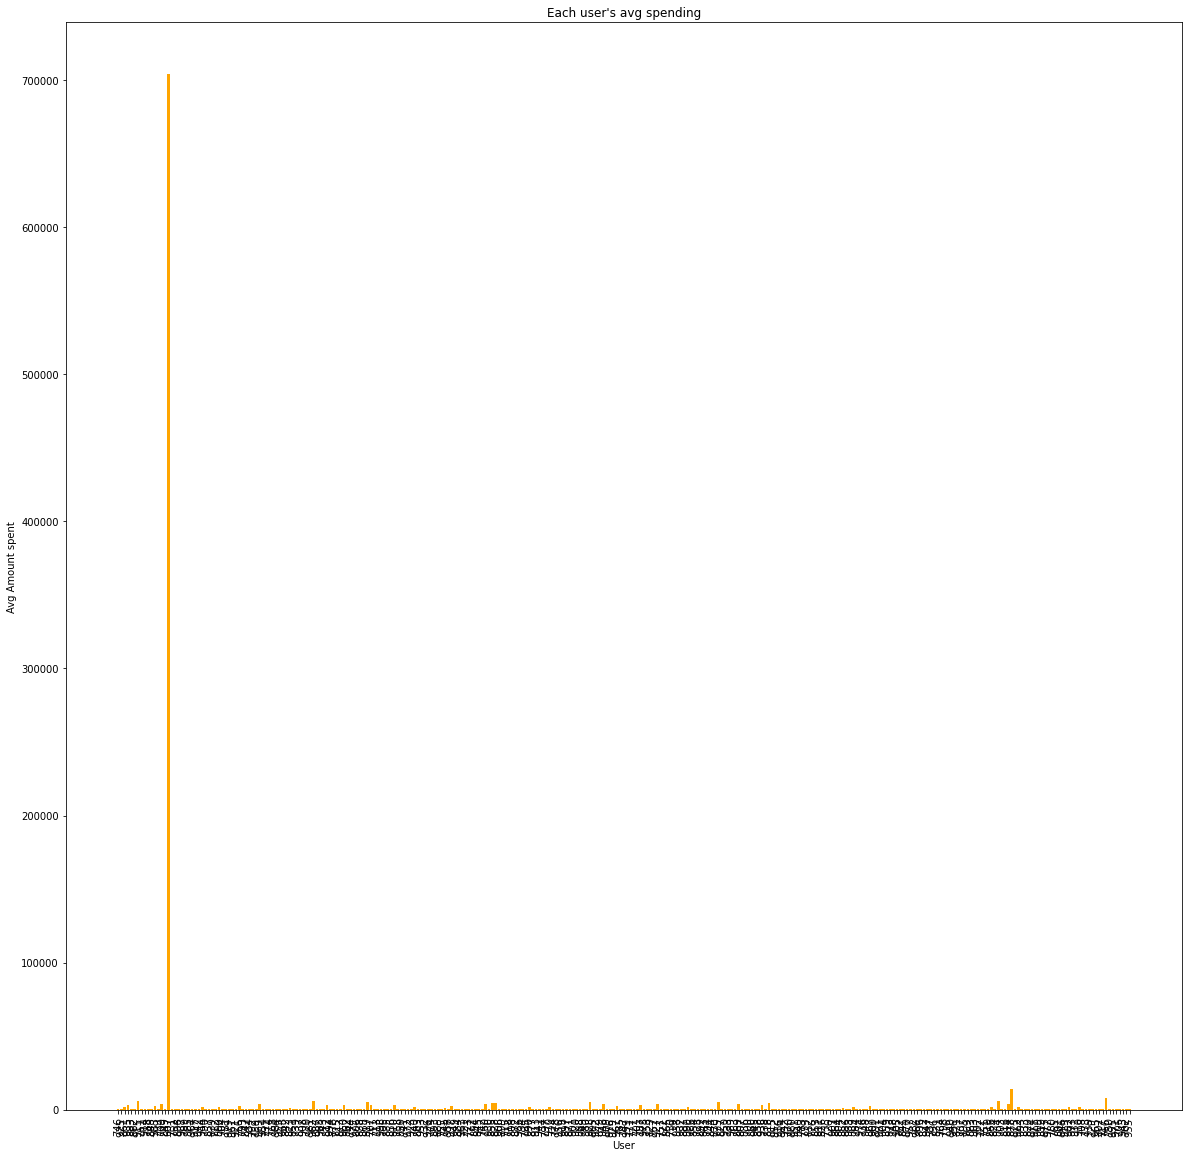

In [18]:
fig = plt.figure(figsize=(20,20))
plt.bar(user,avg_amount,color='orange')
plt.xlabel('User')
plt.ylabel('Avg Amount spent')
plt.title('Each user\'s avg spending')
plt.xticks(rotation=90)
plt.show()

In [19]:
print(list(spend.keys())[list(spend.values()).index(max(avg_amount))]) 

607


Analyzing the above plot, we can observe that majority of user spend in a similar way, but for **user_id: 607**, we can identify that his/her spending is affecting the average value metric (AOV).

In [20]:
data_sort[data_sort['user_id'] == '607']

,index,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
209,4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
210,520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
554,60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
1035,2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1036,15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1757,1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1912,2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2380,1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
2673,1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
3045,1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00


**User: 607** always spends $704000 and buys 2000 items. Therefore the AOV metric used earlier is does not represent each user's spending correctly as it just averages the amount spend by customers. Average is not a suitable metric for skewed dataset, we use **median** for such datasets.

Thus, below given metric gives more acceptable measure of AOV where the products are sneakers, a relatively affordable item, 

In [25]:
data_sort['order_amount'].median()

284.0

Now, this gives a more reasonable value for AOV, thus for this dataset we should use median. **It's value is 284**.

**Question a.** Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

**Answer:** The data has an outlier and the calculation is mean, mean is more vulnerable to outliers thus considering median as a metric is more suitable for skewed data like this one.

**Question b.** What metric would you report for this dataset?

**Answer:** Median

**Question c.** What is its value?

**Answer:** It's value is 284, which gives more reasonable measure about given dataset.  